<a href="https://colab.research.google.com/github/addkishore/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/4_Malaria_detection_CNN3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kishorrekumar","key":"077d0a8fd2c08d1c0336bdcbd5f9ab28"}'}

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/'

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 98% 663M/675M [00:03<00:00, 130MB/s]
100% 675M/675M [00:04<00:00, 176MB/s]


In [ ]:
!unzip /content/cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
main_folder='/content/cell_images'
number_of_images={}
number_of_images1={}
other_folder='/content/cell_images/cell_images'

In [ ]:
for dir in os.listdir(main_folder):
  number_of_images[dir]=len(os.listdir(os.path.join(main_folder,dir)))
number_of_images.items()

dict_items([('Parasitized', 13780), ('Uninfected', 13780), ('cell_images', 2)])

In [ ]:
for dir in os.listdir(other_folder):
  number_of_images1[dir]=len(os.listdir(os.path.join(other_folder,dir)))
number_of_images1.items()

dict_items([('Parasitized', 13780), ('Uninfected', 13780)])

In [ ]:
os.mkdir('./train')

In [ ]:
import numpy as np
import pandas as pd
import math
import shutil

In [ ]:
for dir in os.listdir(other_folder):
  os.makedirs('./train/'+dir)
  for omg in np.random.choice(a=os.listdir(os.path.join(other_folder,dir)),
                              size=math.floor(0.8*number_of_images1[dir]),replace=False):
    O=os.path.join(other_folder,dir,omg)
    p=os.path.join('./train',dir)
    shutil.copy(O,p)
    os.remove(O)

In [ ]:
for dir in os.listdir(other_folder):
  number_of_images1[dir]=len(os.listdir(os.path.join(other_folder,dir)))
number_of_images1.items()


dict_items([('Parasitized', 2756), ('Uninfected', 2756)])

In [ ]:
os.mkdir('./test')
for dir in os.listdir(other_folder):
  path=os.path.join(other_folder,dir)
  dest=os.path.join('./test',dir)
  shutil.copytree(path,dest)

In [ ]:
len(os.listdir('/content/test/Parasitized'))

2756

In [ ]:
len(os.listdir('/content/train/Parasitized'))

11024

In [ ]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
IMAGE_SIZE=[224,224]

train_path='/content/train'
test_path='/content/test'

In [ ]:
vgg19=VGG19(input_shape=IMAGE_SIZE+ [3],weights='imagenet',include_top= False)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg19.layers:
  layer.trainable=False


In [ ]:
folder=glob('/content/train/*')

In [ ]:
folder

['/content/train/Parasitized', '/content/train/Uninfected']

In [ ]:
x=Flatten()(vgg19.output)

In [ ]:
predictions=Dense(len(folder),activation='softmax')(x)

In [ ]:

model=Model(inputs=vgg19.input,outputs=predictions)

In [ ]:

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:

from tensorflow.keras.layers import MaxPooling2D


In [ ]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']


)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen= ImageDataGenerator(rescale=1./255)

In [ ]:
training_set= train_datagen.flow_from_directory('/content/train',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical'
                                                )

Found 22046 images belonging to 2 classes.


In [ ]:
test_set= train_datagen.flow_from_directory('/content/test',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical'
                                                )

Found 5512 images belonging to 2 classes.


In [ ]:
r= model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=2,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/2
689/689 [==============================] - 365s 530ms/step - loss: 0.1837 - accuracy: 0.9401 - val_loss: 0.1558 - val_accuracy: 0.9503
Epoch 2/2
689/689 [==============================] - 355s 515ms/step - loss: 0.1638 - accuracy: 0.9476 - val_loss: 0.1629 - val_accuracy: 0.9432


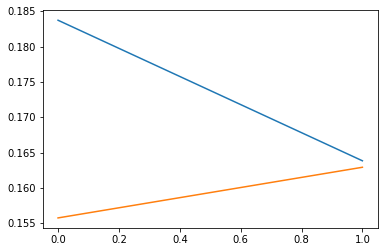

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.show()

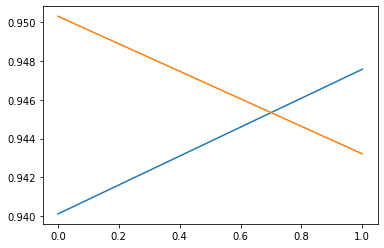

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.show()

In [ ]:
y_pred=model.predict(test_set)

In [ ]:
y_pred

array([[9.9992394e-01, 7.5999713e-05],
       [9.9460608e-01, 5.3939554e-03],
       [9.9930334e-01, 6.9667835e-04],
       ...,
       [2.5150558e-02, 9.7484946e-01],
       [6.0961228e-02, 9.3903875e-01],
       [9.6565835e-02, 9.0343410e-01]], dtype=float32)

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model.save('model_vgg19.h5')

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('/content/test/Uninfected/C100P61ThinF_IMG_20150918_144823_cell_142.png',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [ ]:
a= np.argmax(model.predict(img_data),axis=1)

NameError: ignored

In [ ]:
if (a==1):
  print('uninfected')
else:
    print('infected')

NameError: ignored